In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Use the print function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-35.84565081583972 -159.01072070251945
72.68753846429593 33.502745043050226
-21.536692096439197 132.80189017625707
11.505458188820555 51.44983890376102
43.32289021571327 87.9583127085499
6.604109035604949 -97.59396720026163
-6.030287562305418 143.30171541910426
-17.488381412934658 -27.351619010961144
-47.41699873002007 43.5206230987194
-65.7420562661126 -131.54697743389085
79.3109882729386 -75.99285324315753
76.7353307806118 -145.7660278554212
66.74063666683867 20.56785228677225
49.6899258870294 160.66012711265864
52.0597195402504 37.02168340136487
50.21940021199953 -157.12535603067076
-14.70776392897119 -153.71339342783992
-69.70662422531326 -58.006156543519026
79.65191188663891 75.8477361048522
-45.83619547547725 159.07798411773666
-23.804611802662876 23.21163351514184
-77.7699838749105 52.34125091836145
-82.64919783406135 -132.60552088614526
-69.42665440125417 67.21368986944469
-58.884724772714954 75.66919231203033
-79.33917025388521 91.14862813105628
71.36813313740257 -121.48769033

In [13]:
from citipy import citipy

In [14]:
# create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the ciy is unique we will add it to the cities list
    if city not in cities:
        cities.append(city)
# print the city count to confirm sufficient count
len(cities)

617

In [7]:
import time
from datetime import datetime

In [15]:
import requests
from config import weather_api_key

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1add68f57af73eb98bfa1fb16836ed92


In [17]:
# list to hold the weather data
city_data = []
# print beginning of logging
print("Beginning Data Retrieval      ")
print("------------------------------")

# create counters
record_count = 1
set_count = 1

# loop through al the cities in the list
for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # log the url, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # convert the data to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass

print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")
        

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | vardo
Processing Record 3 of Set 1 | alice springs
Processing Record 4 of Set 1 | bargal
City not found. Skipping...
Processing Record 5 of Set 1 | urumqi
Processing Record 6 of Set 1 | pochutla
Processing Record 7 of Set 1 | mendi
Processing Record 8 of Set 1 | maceio
Processing Record 9 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | kiruna
Processing Record 14 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 15 of Set 1 | kolpny
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | faanui
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | tuatapere
Processing Record 21 of Set 1 | kang
Processing Record 22 of Set 1 | port a

In [18]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,82.45,89,20,14.97,CK,2022-12-21 20:39:59
1,Vardo,70.3705,31.1107,26.58,93,100,14.97,NO,2022-12-21 20:39:59
2,Alice Springs,-23.7000,133.8833,76.55,57,100,10.36,AU,2022-12-21 20:35:22
3,Urumqi,43.8010,87.6005,0.55,85,11,4.47,CN,2022-12-21 20:36:01
4,Pochutla,15.7432,-96.4661,84.81,51,0,7.27,MX,2022-12-21 20:40:00
5,Mendi,-6.1761,143.6513,57.06,97,100,2.13,PG,2022-12-21 20:40:01
6,Maceio,-9.6658,-35.7353,83.64,65,20,13.80,BR,2022-12-21 20:40:01
7,Rikitea,-23.1203,-134.9692,77.05,81,96,15.03,PF,2022-12-21 20:40:02
8,Qaanaaq,77.4840,-69.3632,-23.73,84,19,6.15,GL,2022-12-21 20:40:03
9,College,64.8569,-147.8028,-32.85,60,20,0.00,US,2022-12-21 20:40:03


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [20]:
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2022-12-21 20:39:59,-21.2078,-159.7750,82.45,89,20,14.97
1,Vardo,NO,2022-12-21 20:39:59,70.3705,31.1107,26.58,93,100,14.97
2,Alice Springs,AU,2022-12-21 20:35:22,-23.7000,133.8833,76.55,57,100,10.36
3,Urumqi,CN,2022-12-21 20:36:01,43.8010,87.6005,0.55,85,11,4.47
4,Pochutla,MX,2022-12-21 20:40:00,15.7432,-96.4661,84.81,51,0,7.27


In [21]:
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

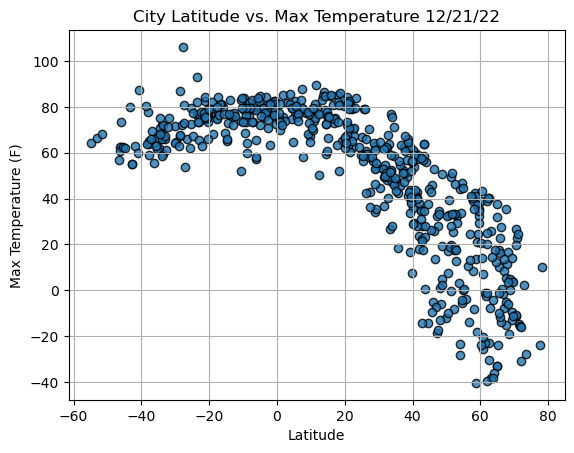

In [24]:
import time

# build the scatter plot for latitude vs max temp
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1,
            marker="o", alpha=0.8, label="Cities")

# design properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
                                                               
plt.savefig("weather_data/Fig1.png")
plt.show()

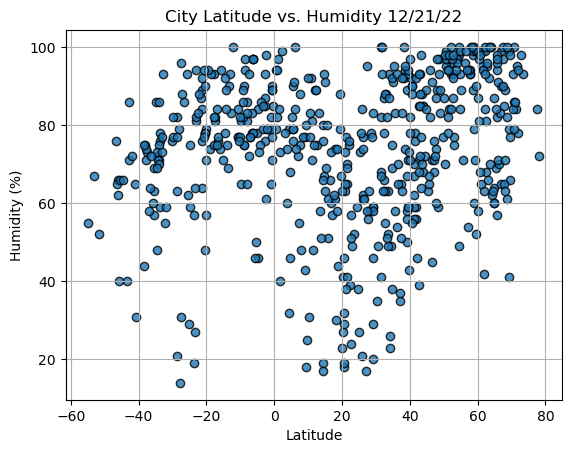

In [25]:
# plot of latitude v humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1,
            marker="o", alpha=0.8, label="Cities")

# design properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
                                                               
plt.savefig("weather_data/Fig2.png")
plt.show()

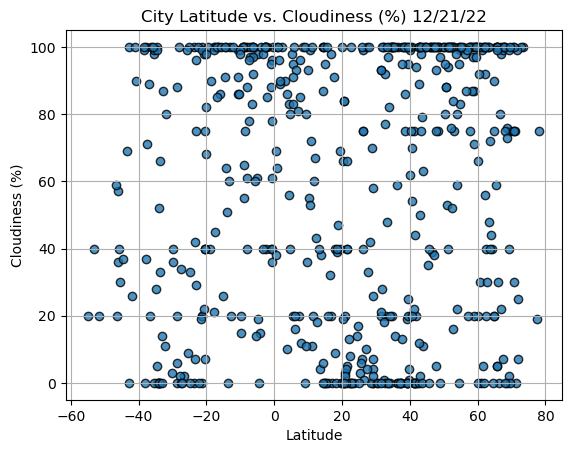

In [26]:
# plot latitude v cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1,
            marker="o", alpha=0.8, label="Cities")

# design properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
                                                               
plt.savefig("weather_data/Fig3.png")
plt.show()

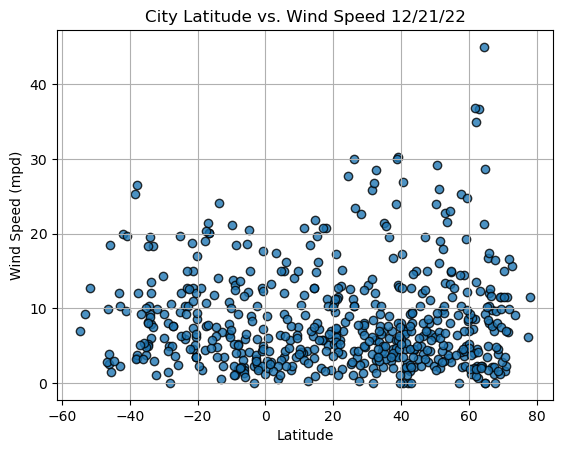

In [27]:
# plot latitude v wind speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1,
            marker="o", alpha=0.8, label="Cities")

# design properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mpd)")
plt.xlabel("Latitude")
plt.grid(True)
                                                               
plt.savefig("weather_data/Fig4.png")
plt.show()